In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## f(x,z) = 13*xs + 7*zs - 12

## Generate data

In [2]:
observation = 1000

xs = np.random.uniform(-10,10,size=(observation,1))
zs = np.random.uniform(-10,10,size=(observation,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-10,10,size=(observation,1))

generated_targets = 13*xs + 7*zs - 12 + noise

np.savez('Minimal Exercise', inputs=generated_inputs, targets=generated_targets)

## Data

In [3]:
training_data = np.load('Minimal Exercise.npz')

In [4]:
training_data['inputs']

array([[-1.44064303,  7.23663954],
       [-2.49211858, -6.53626935],
       [ 3.76456883, -2.17222386],
       ...,
       [-2.14127511,  8.44218688],
       [ 7.63702295, -4.00364546],
       [-3.20306093,  1.99008536]])

## Model

In [5]:
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        output_size, 
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
        )
    ])

## Objective Functions

In [6]:
# learning rate
customized_learning = tf.keras.optimizers.SGD(learning_rate=0.01)

In [9]:
model.compile(optimizer=customized_learning, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 33.4023 - 223ms/epoch - 7ms/step
Epoch 2/100
32/32 - 0s - loss: 32.7903 - 35ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 32.9492 - 33ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 32.6679 - 34ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 32.9531 - 34ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 32.5419 - 30ms/epoch - 944us/step
Epoch 7/100
32/32 - 0s - loss: 32.9619 - 30ms/epoch - 944us/step
Epoch 8/100
32/32 - 0s - loss: 32.8530 - 32ms/epoch - 997us/step
Epoch 9/100
32/32 - 0s - loss: 32.8325 - 33ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 32.6031 - 33ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 32.9296 - 36ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 32.7244 - 33ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 33.1776 - 32ms/epoch - 1000us/step
Epoch 14/100
32/32 - 0s - loss: 32.8398 - 33ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 33.3843 - 32ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 32.7729

## Extract weights and bias

In [8]:
model.layers[0].get_weights()

[array([[13.41045  ],
        [ 6.8517995]], dtype=float32),
 array([-12.314577], dtype=float32)]

In [12]:
print('weights: ' + str(model.layers[0].get_weights()[0]))
print('bias: ' + str(model.layers[0].get_weights()[1]))

weights: [[13.120519 ]
 [ 6.9249663]]
bias: [-12.413222]


## Make prediction

In [14]:
prediction = model.predict_on_batch(training_data['inputs'])

## Plot the targets vs prediction/output

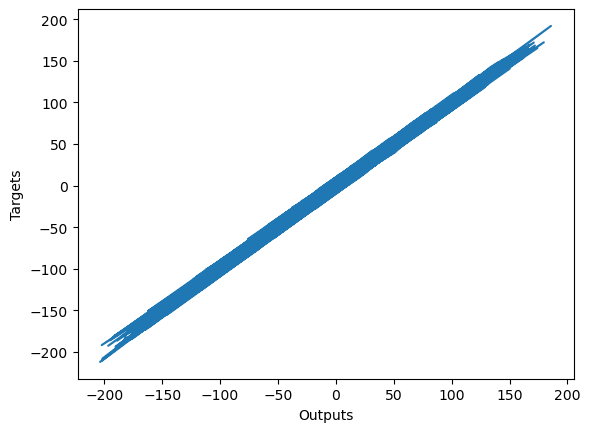

In [17]:
plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()